In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [4]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [5]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS=3
EPOCHS=10

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"plantvillage",
shuffle=True,
image_size = (IMAGE_SIZE,IMAGE_SIZE),
batch_size = BATCH_SIZE
)

Found 2162 files belonging to 3 classes.


In [7]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
len(dataset)

68

In [9]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 2 0 1 0 0 1 1 0 0 0 1 0 1 0 0]


In [10]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[159. 161. 174.]
  [161. 163. 176.]
  [164. 166. 179.]
  ...
  [176. 178. 190.]
  [179. 181. 193.]
  [181. 183. 195.]]

 [[158. 160. 173.]
  [158. 160. 173.]
  [157. 159. 172.]
  ...
  [175. 177. 189.]
  [178. 180. 192.]
  [179. 181. 193.]]

 [[160. 162. 175.]
  [160. 162. 175.]
  [160. 162. 175.]
  ...
  [174. 176. 188.]
  [175. 177. 189.]
  [176. 178. 190.]]

 ...

 [[108. 105. 116.]
  [113. 110. 121.]
  [117. 114. 125.]
  ...
  [143. 141. 152.]
  [144. 142. 153.]
  [145. 143. 154.]]

 [[112. 109. 120.]
  [115. 112. 123.]
  [117. 114. 125.]
  ...
  [138. 136. 147.]
  [137. 135. 146.]
  [143. 141. 152.]]

 [[106. 103. 114.]
  [108. 105. 116.]
  [110. 107. 118.]
  ...
  [143. 141. 152.]
  [141. 139. 150.]
  [137. 135. 146.]]]


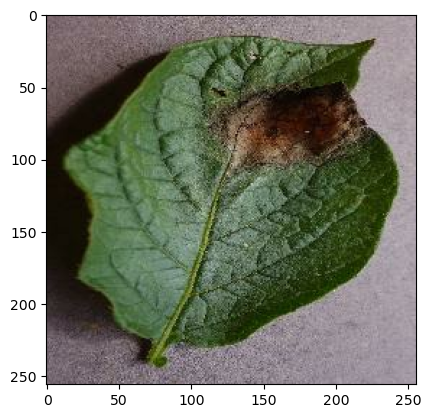

In [11]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    

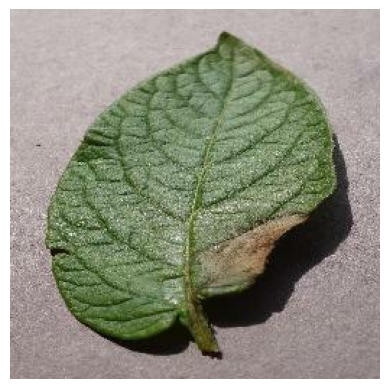

In [12]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")

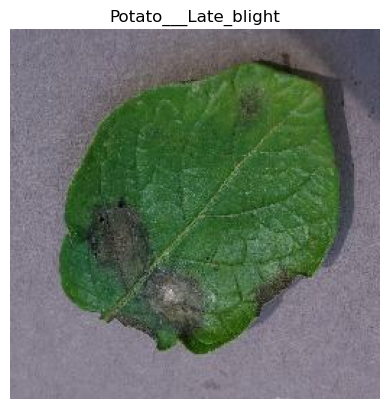

In [13]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

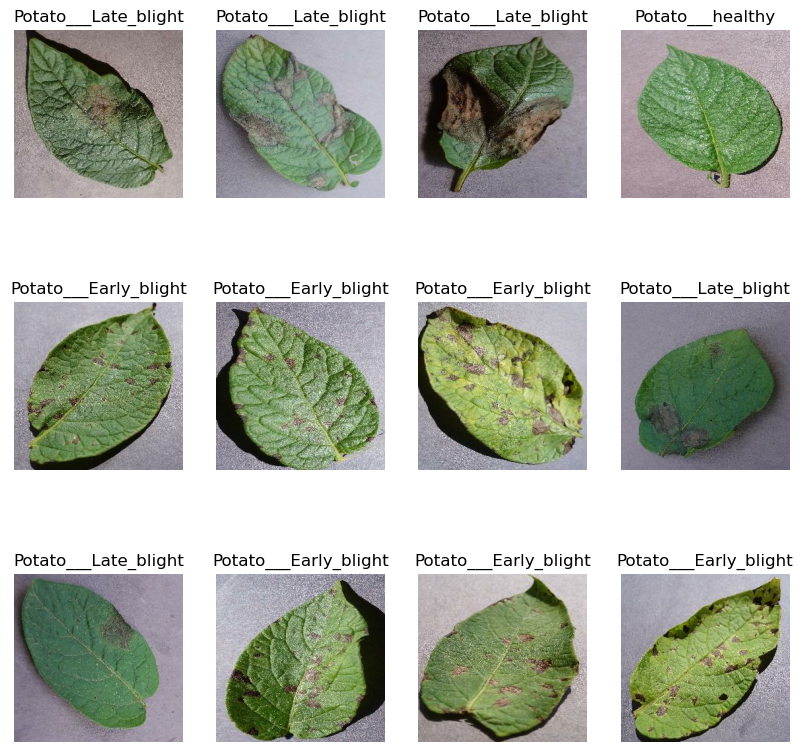

In [14]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [15]:
len(dataset)

68

In [16]:
80% ==> training
20% ==> 10% validation, 10% test

SyntaxError: invalid syntax (829920516.py, line 1)

In [17]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [18]:
train_ds = dataset.take(54)
len(train_ds)

54

In [19]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [20]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [21]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [22]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [23]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [24]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [25]:
len(train_ds)

54

In [26]:
len(val_ds)

6

In [27]:
len(test_ds)

8

In [28]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [29]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [30]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [31]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [33]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [34]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/10
54/54 [==============================] - 318s 3s/step - loss: 0.9030 - accuracy: 0.4647 - val_loss: 0.9365 - val_accuracy: 0.4583
Epoch 2/10
54/54 [==============================] - 129s 2s/step - loss: 0.6963 - accuracy: 0.6481 - val_loss: 0.6214 - val_accuracy: 0.7240
Epoch 3/10
54/54 [==============================] - 128s 2s/step - loss: 0.4872 - accuracy: 0.7899 - val_loss: 0.4398 - val_accuracy: 0.8125
Epoch 4/10
54/54 [==============================] - 126s 2s/step - loss: 0.4480 - accuracy: 0.8218 - val_loss: 0.5414 - val_accuracy: 0.7604
Epoch 5/10
54/54 [==============================] - 126s 2s/step - loss: 0.2784 - accuracy: 0.8825 - val_loss: 0.2317 - val_accuracy: 0.9062
Epoch 6/10
54/54 [==============================] - 249s 5s/step - loss: 0.2447 - accuracy: 0.9144 - val_loss: 0.5605 - val_accuracy: 0.7917
Epoch 7/10
54/54 [==============================] - 128s 2s/step - loss: 0.2035 - accuracy: 0.9282 - val_loss: 0.6352 - val_accuracy: 0.7760
Epoch 8/10
54

In [35]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 6s 374ms/step - loss: 0.3139 - accuracy: 0.8906


In [36]:
scores

[0.31393104791641235, 0.890625]

In [37]:
history

In [38]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [39]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [40]:
history.history['accuracy']

[0.46469905972480774,
 0.6481481194496155,
 0.7899305820465088,
 0.8217592835426331,
 0.8825231194496155,
 0.9143518805503845,
 0.9282407164573669,
 0.9363425970077515,
 0.9467592835426331,
 0.9490740895271301]

In [41]:
len(history.history['accuracy'])

10

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

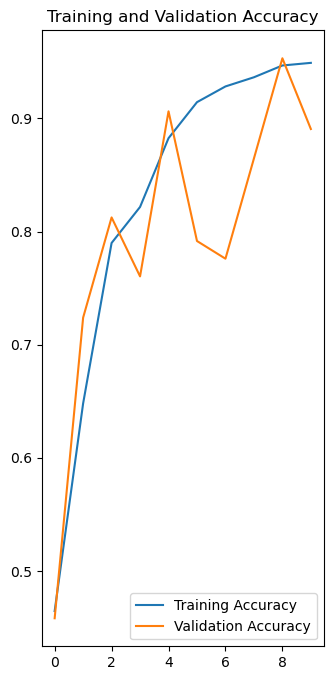

In [43]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

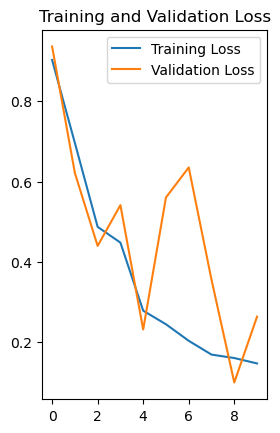

In [44]:
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [45]:
for images_batch, labels_batch in test_ds.take(1):
    
    print(image_batch[0])

tf.Tensor(
[[[127. 115. 115.]
  [137. 125. 125.]
  [135. 123. 123.]
  ...
  [140. 126. 125.]
  [150. 136. 135.]
  [127. 113. 112.]]

 [[127. 115. 115.]
  [132. 120. 120.]
  [131. 119. 119.]
  ...
  [141. 127. 126.]
  [151. 137. 136.]
  [132. 118. 117.]]

 [[124. 112. 112.]
  [126. 114. 114.]
  [134. 122. 122.]
  ...
  [143. 129. 128.]
  [153. 139. 138.]
  [141. 127. 126.]]

 ...

 [[161. 150. 156.]
  [159. 148. 154.]
  [161. 150. 156.]
  ...
  [188. 178. 176.]
  [184. 174. 172.]
  [181. 171. 169.]]

 [[161. 150. 156.]
  [157. 146. 152.]
  [157. 146. 152.]
  ...
  [192. 182. 180.]
  [187. 177. 175.]
  [181. 171. 169.]]

 [[156. 145. 151.]
  [151. 140. 146.]
  [151. 140. 146.]
  ...
  [195. 185. 183.]
  [189. 179. 177.]
  [183. 173. 171.]]], shape=(256, 256, 3), dtype=float32)


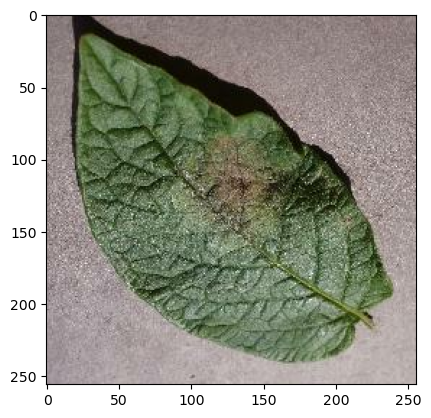

In [46]:
for images_batch, labels_batch in test_ds.take(1):
    
    plt.imshow(image_batch[0].numpy().astype('uint8'))

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 1s 806ms/step
predicted label: Potato___Early_blight


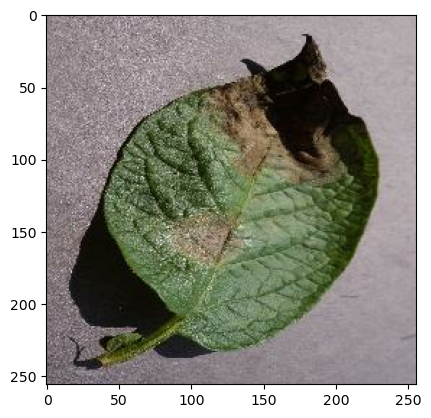

In [47]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [48]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

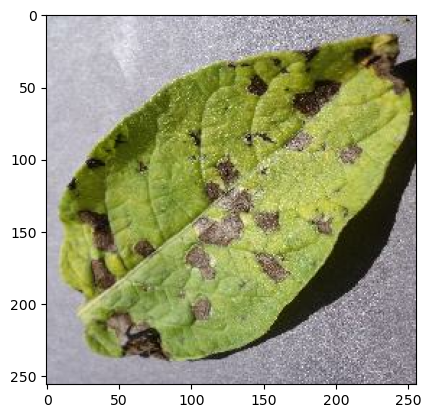

In [49]:
for images, labels in test_ds.take(1):
    for i in range(9):
        plt.imshow(images[i].numpy().astype("uint8"))

1/1 [==============================] - 0s 50ms/step


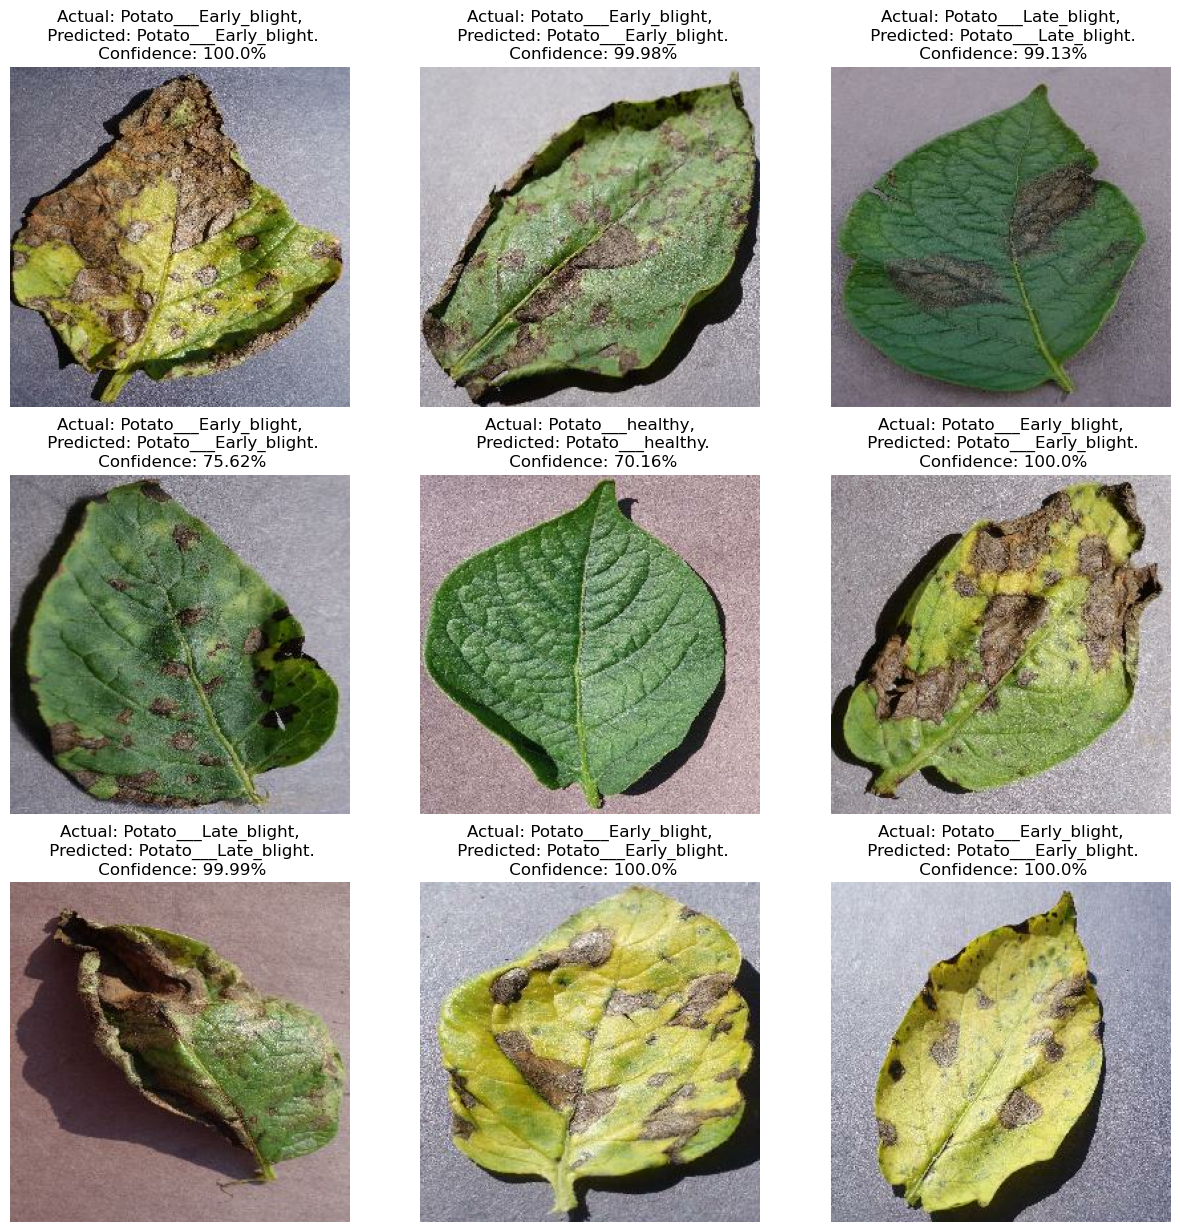

In [50]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [52]:
model_version=1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets


In [53]:
tf.keras.models.save_model(model, 'my_model.hdf5')

In [55]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import streamlit as st


@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # potato Classification
         """
         )

file = st.file_uploader("Please upload an file", type=["jpg", "png"])

Overwriting app.py
